In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import networks
import torch.nn.functional as F
import scipy.ndimage as ndimage
from torch.autograd import Variable
from networks import *
import numpy as np
import config as cf
import torch.optim as optim
from itertools import starmap
import math

In [10]:
sig = 1.0
#start_epoch, num_epochs, batch_size, optim_type = cf.start_epoch, cf.num_epochs, cf.batch_size, cf.optim_type


transform_test = transforms.Compose([
    transforms.Lambda(lambda x: ndimage.gaussian_filter(x, sigma=sig)),
    transforms.ToTensor(),
    transforms.Normalize(cf.mean['cifar100'], cf.std['cifar100']),
])

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=False, transform=transform_test)
num_classes = 100
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

NameError: name 'transforms' is not defined

In [62]:
checkpoint_gauss = torch.load("./checkpoint/cifar100/resnet-50_gaussian.t7")
checkpoint2 = torch.load("./checkpoint/cifar100/resnet-50_readouttest.t7")

net1 = checkpoint_gauss['net'].cpu()
net2 = checkpoint2['net'].cpu()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'networks.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'networks.resnet.Bottleneck' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [63]:
x = next(iter(testloader))

In [65]:
out = net1(x[0])

In [48]:
net1.eval()
test_loss = 0
correct = 0
total = 0

for batch_idx, (inputs, targets) in enumerate(testloader):
    inputs, targets = inputs.cuda(), targets.cuda()
    inputs, targets = Variable(inputs, volatile=True), Variable(targets)
    #batch_var = np.append(batch_var, torch.std(inputs.cpu()).data)
    outputs = net1(inputs)

    _, predicted = torch.max(outputs.data, 1)
    total += targets.size(0)
    correct += predicted.eq(targets.data).cpu().sum()

acc = 100.*correct/total
#variance = batch_var.mean()
print("| Test Result\tAcc@1: %.2f%%" %(acc))
std = 0.
for images, _ in testloader:
    batch_samples = images.size(0)
    #print(batch_samples)
    images = images.view(batch_samples,images.size(1), -1)
    #print(images.shape)
    std += images.std(2).sum(0)
    #print(std)
std /= len(testloader.dataset)
#print(std)
print(sig/std.mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


| Test Result	Acc@1: 1.00%
tensor(6.1658)


### Plotting Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import pandas as pd

In [2]:
df = pd.read_csv("Noise Level vs Accuracy (Robust Networks) - Sheet1.csv")

In [3]:
df

,Noise Level,Robust Level 1,Robust Level 10,Robust Random Levels
0,0.0000,3,0,63
1,1.5434,68,1,62
2,3.6026,5,1,53
3,13.2251,1,1,25
4,49.6510,1,17,12


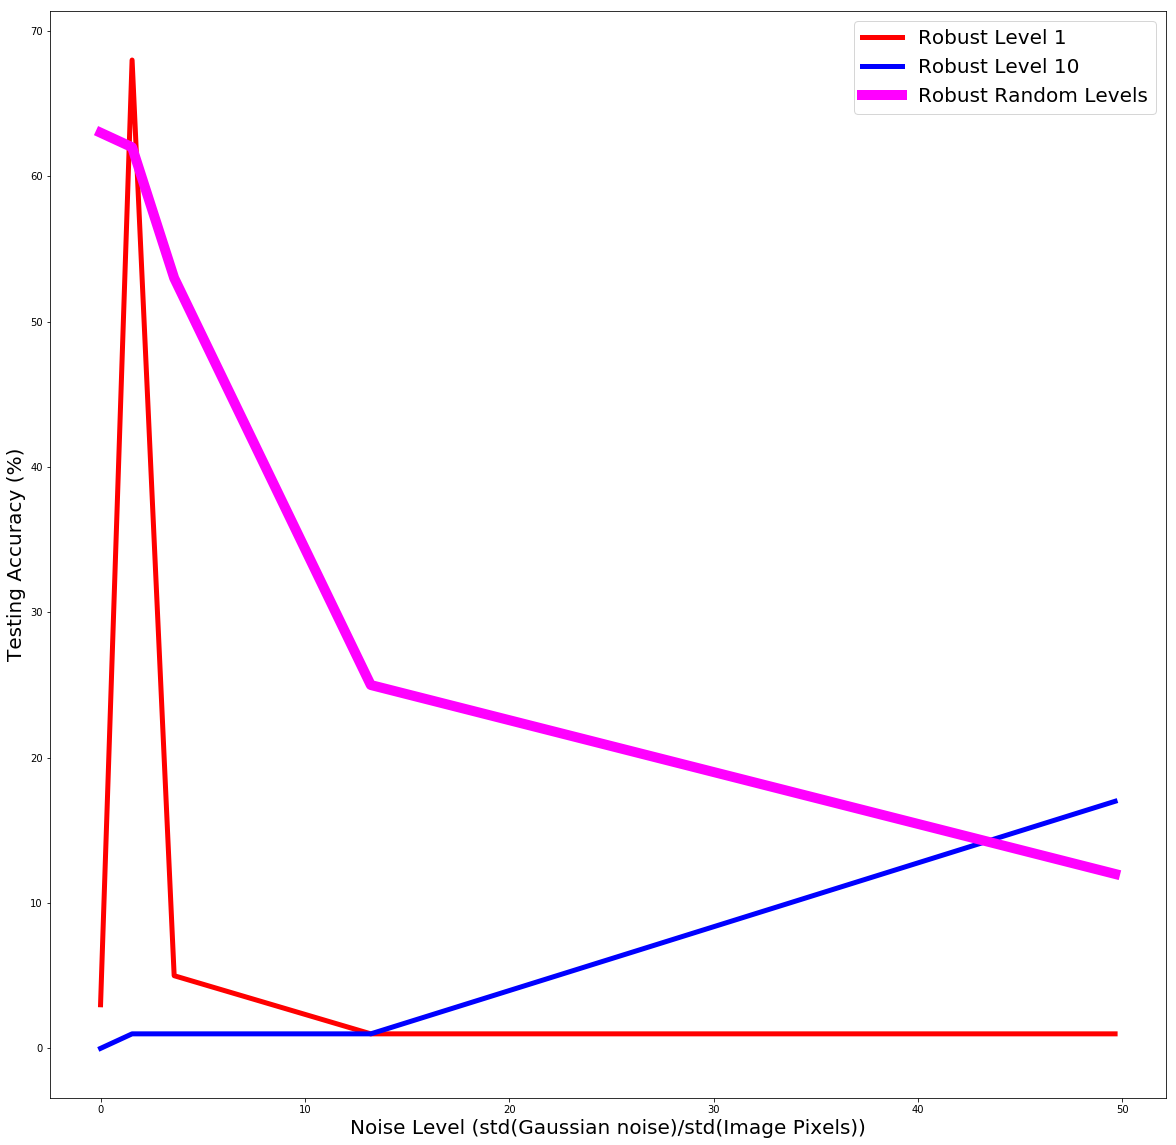

In [9]:
plt.figure(figsize=(20,20))
plt.xlabel('Noise Level (std(Gaussian noise)/std(Image Pixels))', fontsize=20)
plt.ylabel('Testing Accuracy (%)', fontsize=20)
plt.plot('Noise Level', 'Robust Level 1', data=df, color='red', linewidth=5)
plt.plot('Noise Level', 'Robust Level 10', data=df, color='blue', linewidth=5)
plt.plot('Noise Level', 'Robust Random Levels', data=df, color='magenta', linewidth=10)
plt.legend(fontsize=20)
plt.savefig("NvAcc_robust")

<Figure size 432x288 with 0 Axes>

In [59]:
net1

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      

In [67]:
out.shape

torch.Size([100, 100])

In [12]:
torch.cuda.device_count()

1

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt